Accuracy: 89.71%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       580
           1       0.84      0.70      0.76       178

    accuracy                           0.90       758
   macro avg       0.87      0.83      0.85       758
weighted avg       0.89      0.90      0.89       758



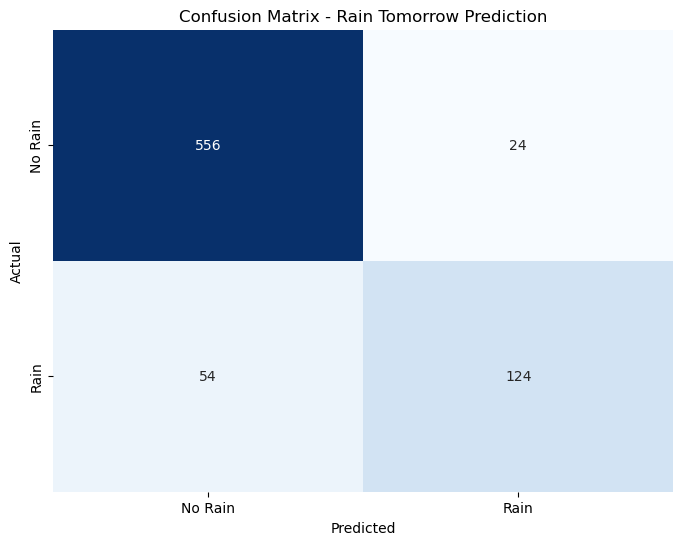

Mean Absolute Error (MAE): 0.04 mm


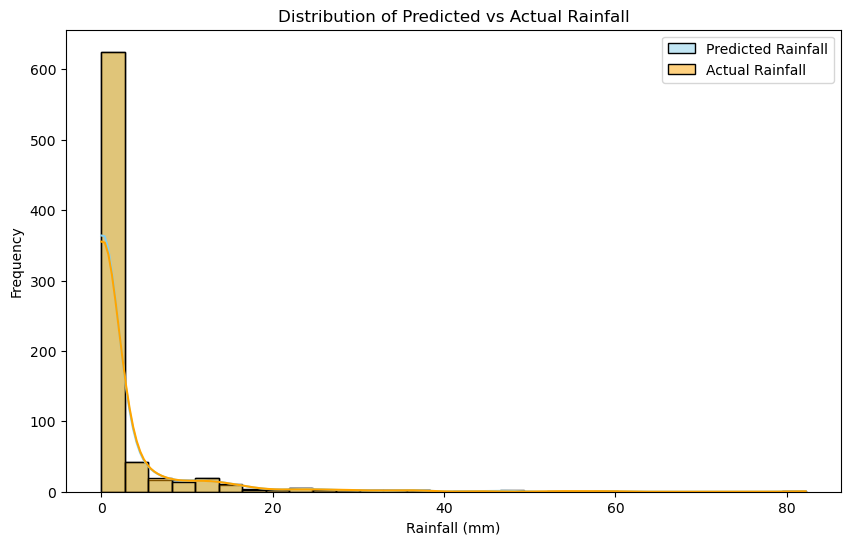

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, mean_absolute_error

file_path = r"C:\Users\sv697\Downloads\weatherAUS.csv"
df = pd.read_csv(file_path)

df = df.dropna()

le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['Location'] = le.fit_transform(df['Location'])

features = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
            'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 
            'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 
            'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']

X = df[features]
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Rain', 'Rain'],
            yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix - Rain Tomorrow Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

regressor = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
regressor.fit(X_train, df['Rainfall'].loc[X_train.index])

rainfall_predictions = regressor.predict(X_test)

mae = mean_absolute_error(df['Rainfall'].loc[X_test.index], rainfall_predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f} mm")

plt.figure(figsize=(10, 6))
sns.histplot(rainfall_predictions, bins=30, kde=True, color='skyblue', label='Predicted Rainfall')
sns.histplot(df['Rainfall'].loc[X_test.index], bins=30, kde=True, color='orange', label='Actual Rainfall')
plt.title('Distribution of Predicted vs Actual Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

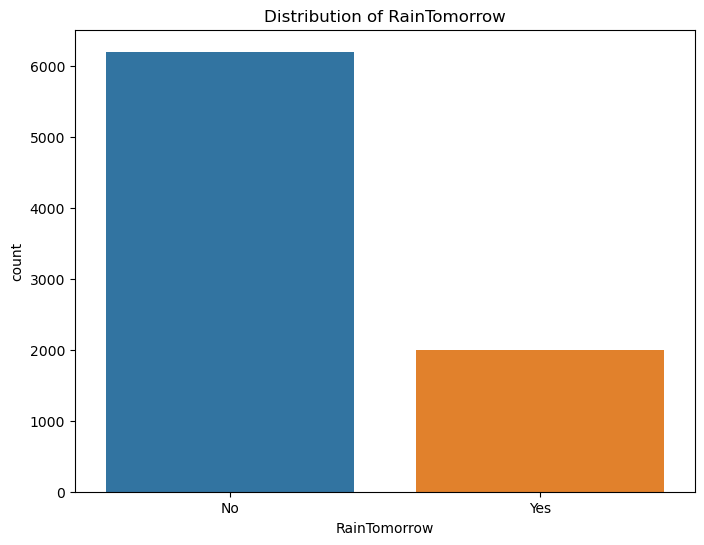

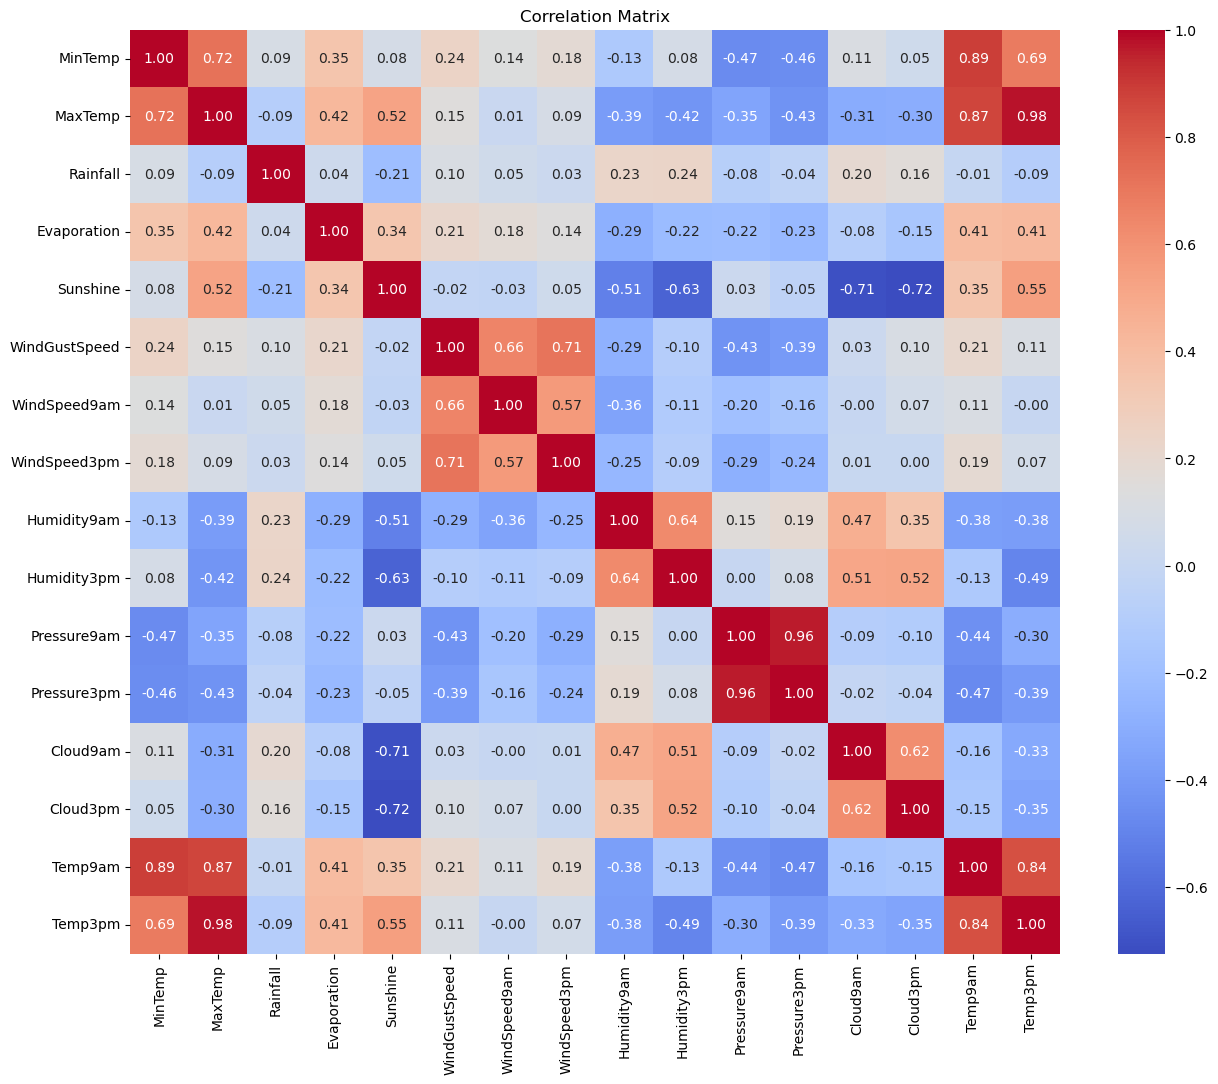

      Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
3862        10     11.5     23.3       0.0           10      37.000000   
2128         6     21.4     28.3       0.0            3      40.040094   
2019         6     11.8     29.8       0.0            3      40.040094   
4036        10      8.0     28.8       0.0            3      35.000000   
420          1     14.3     35.8       0.0           14      35.000000   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
3862          13           8          11.0          30.0         74.0   
2128           9           9           9.0          28.0         83.0   
2019           4           9           4.0           4.0         76.0   
4036           7           7           9.0          19.0         63.0   
420            0          15           6.0          17.0         47.0   

      Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
3862         60.0   1031.10000  1028.800

C:\Users\sv697\AppData\Local\Temp\ipykernel_2448\1686186597.py:48: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]).columns


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

file_path = r"C:\Users\sv697\Downloads\weatherAUS.csv"
df = pd.read_csv(file_path)

print(df.info())

print(df.describe())

print(df.isnull().sum())

plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.show()

plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
df = df.dropna(subset=['RainTomorrow'])  # Drop rows with missing target variable
df = df.drop(['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1)  # Drop columns with many missing values

numeric_features = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_features] = imputer.fit_transform(df[numeric_features])

categorical_features = df.select_dtypes(include=[np.object]).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)  
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['Location'] = le.fit_transform(df['Location'])

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.impute import SimpleImputer

file_path = r"C:\Users\sv697\Downloads\weatherAUS.csv"
df = pd.read_csv(file_path)

df = df.dropna(subset=['RainTomorrow'])

df = df.drop(['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'], axis=1)

numeric_features = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_features] = imputer.fit_transform(df[numeric_features])

categorical_features = df.select_dtypes(include=[np.object]).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)  
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])

df = pd.get_dummies(df, columns=['Location'], drop_first=True)

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForestClassifier:")
print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Model 2: XGBoostClassifier
xgb_classifier = xgb.XGBClassifier(objective ='binary:logistic', random_state=42)
xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nXGBoostClassifier:")
print(f"Accuracy: {accuracy_xgb * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Model 3: Logistic Regression
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

y_pred_logreg = logreg_classifier.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_logreg * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))


C:\Users\sv697\AppData\Local\Temp\ipykernel_2448\3601331214.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]).columns


RandomForestClassifier:
Accuracy: 89.93%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1248
           1       0.87      0.68      0.76       390

    accuracy                           0.90      1638
   macro avg       0.89      0.82      0.85      1638
weighted avg       0.90      0.90      0.89      1638


XGBoostClassifier:
Accuracy: 89.38%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1248
           1       0.85      0.67      0.75       390

    accuracy                           0.89      1638
   macro avg       0.88      0.82      0.84      1638
weighted avg       0.89      0.89      0.89      1638


Logistic Regression:
Accuracy: 82.91%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1248
           1       0.72      0.46      0.56       3

C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

file_path = r"C:\Users\sv697\Downloads\weatherAUS.csv"
df = pd.read_csv(file_path)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

y_pred_knn = knn_classifier.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("k-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


k-Nearest Neighbors:
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1638

    accuracy                           1.00      1638
   macro avg       1.00      1.00      1.00      1638
weighted avg       1.00      1.00      1.00      1638



C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-Validation Scores: [0.80489614 0.79896142 0.81824926 0.79970326 0.8041543 ]
Mean CV Accuracy: 0.81
Training Accuracy: 0.81
Testing Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1264
           1       0.73      0.45      0.56       421

    accuracy                           0.82      1685
   macro avg       0.79      0.70      0.72      1685
weighted avg       0.81      0.82      0.81      1685

Confusion Matrix:
[[1195   69]
 [ 230  191]]


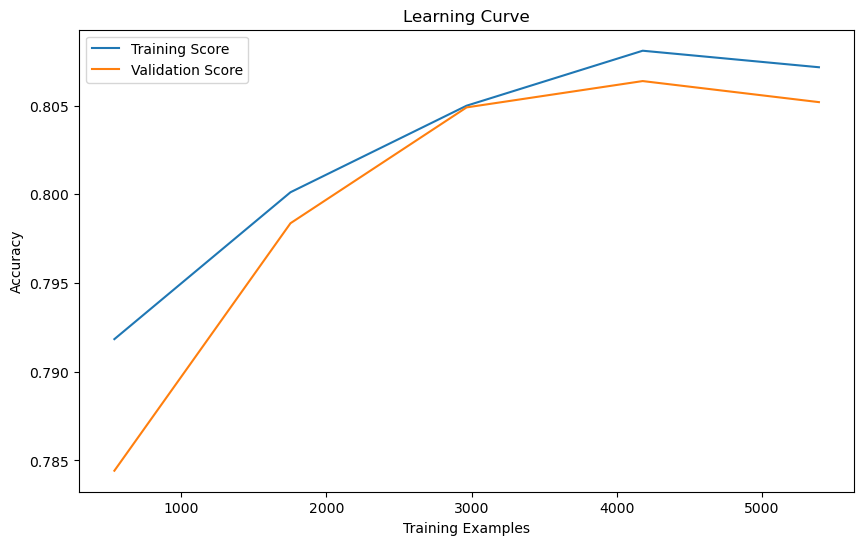

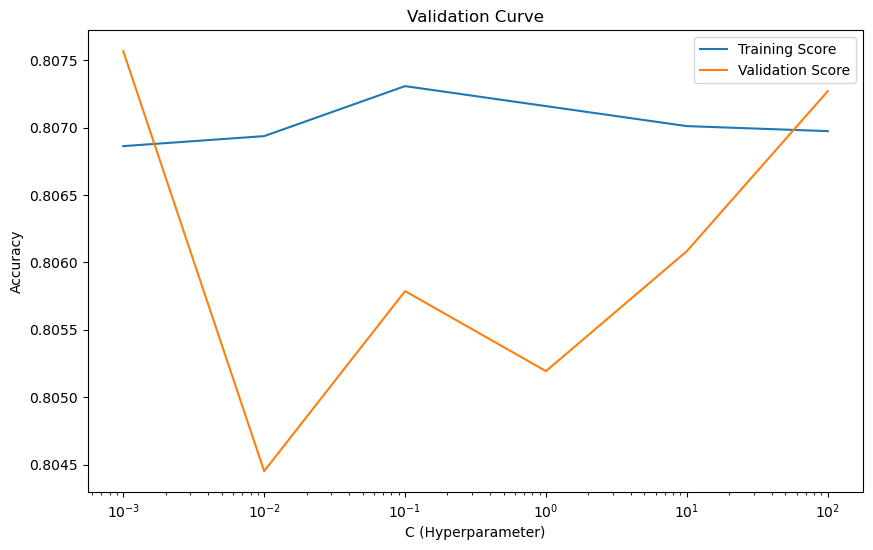

Cross-Validation Scores: [0.87908012 0.87017804 0.88872404 0.86498516 0.88130564]
Mean CV Accuracy: 0.88
Training Accuracy: 1.00
Testing Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1264
           1       0.89      0.73      0.80       421

    accuracy                           0.91      1685
   macro avg       0.90      0.85      0.87      1685
weighted avg       0.91      0.91      0.91      1685

Confusion Matrix:
[[1224   40]
 [ 112  309]]


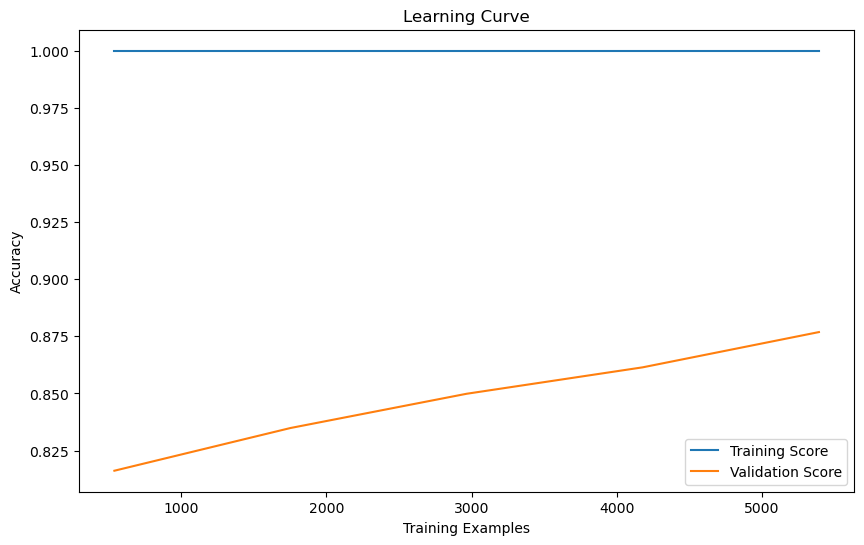

Cross-Validation Scores: [0.865727   0.86350148 0.87611276 0.87537092 0.8879822 ]
Mean CV Accuracy: 0.87
Training Accuracy: 1.00
Testing Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1264
           1       0.85      0.77      0.81       421

    accuracy                           0.91      1685
   macro avg       0.89      0.86      0.87      1685
weighted avg       0.91      0.91      0.91      1685

Confusion Matrix:
[[1208   56]
 [  98  323]]


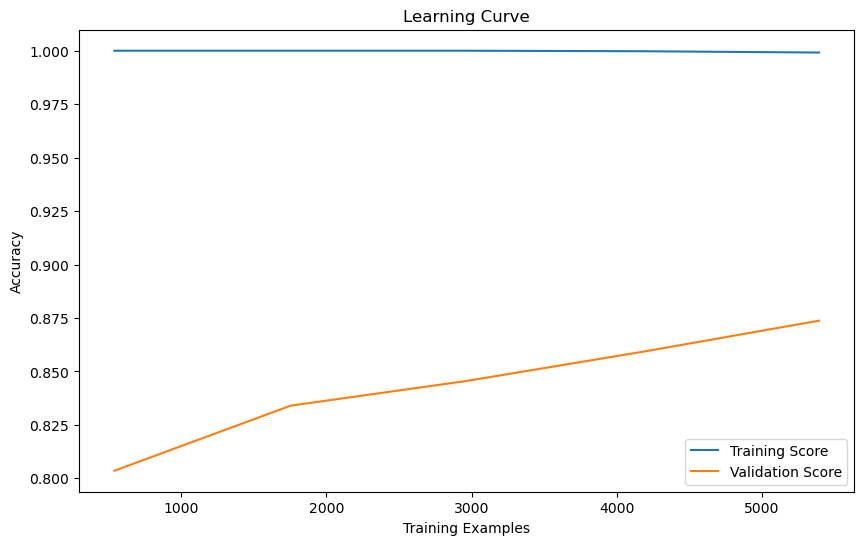

C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Cross-Validation Scores: [0.8115727  0.80563798 0.81602374 0.8041543  0.83086053]
Mean CV Accuracy: 0.81


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Training Accuracy: 0.87
Testing Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1264
           1       0.70      0.56      0.62       421

    accuracy                           0.83      1685
   macro avg       0.78      0.74      0.76      1685
weighted avg       0.82      0.83      0.82      1685

Confusion Matrix:
[[1165   99]
 [ 185  236]]


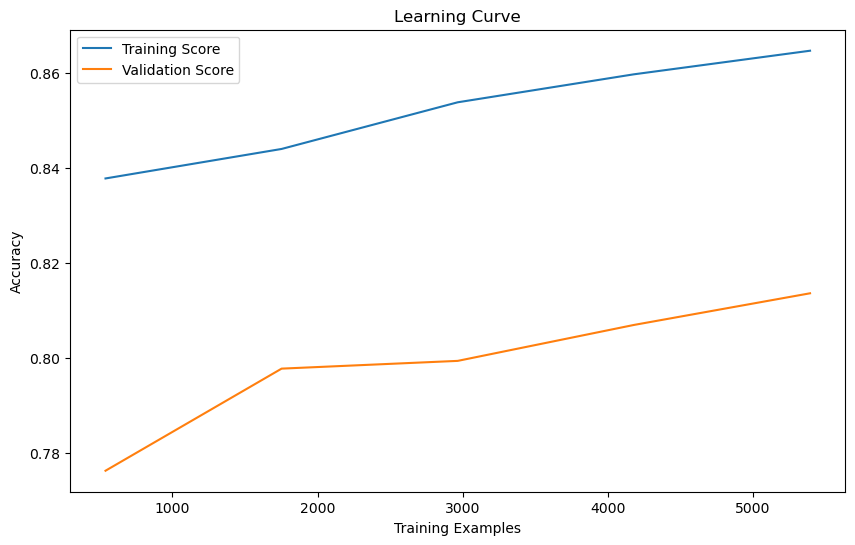

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

file_path = r"C:\Users\sv697\Downloads\weatherAUS.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop('Date', axis=1)

le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])

df = pd.get_dummies(df, columns=['Location'], drop_first=True)

df.fillna(0, inplace=True) 

df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x in [1, 2] else 0)

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
 
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"Training Accuracy: {accuracy_train:.2f}")
    
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Testing Accuracy: {accuracy_test:.2f}")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    if hasattr(model, 'C'):
        param_range = [0.001, 0.01, 0.1, 1, 10, 100]
        train_scores, test_scores = validation_curve(model, X_train, y_train, param_name='C', param_range=param_range, cv=cv, scoring='accuracy', n_jobs=-1)
        
        plt.figure(figsize=(10, 6))
        plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
        plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
        plt.title('Validation Curve')
        plt.xlabel('C (Hyperparameter)')
        plt.ylabel('Accuracy')
        plt.xscale('log')
        plt.legend()
        plt.show()

# Model 1: Logistic Regression
logreg_classifier = LogisticRegression(random_state=42)
evaluate_model(logreg_classifier, X_train, y_train, X_test, y_test)

# Model 2: RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)

# Model 3: XGBoost
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
evaluate_model(xgb_classifier, X_train, y_train, X_test, y_test)

# Model 4: k-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_classifier, X_train, y_train, X_test, y_test)


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-Validation Scores: [0.74252408 0.7511404  0.74239351 0.72920892 0.75557809]
Mean CV Accuracy: 0.74
Training Accuracy: 0.74
Testing Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1264
           1       0.50      0.72      0.59       421

    accuracy                           0.75      1685
   macro avg       0.69      0.74      0.70      1685
weighted avg       0.79      0.75      0.76      1685

Confusion Matrix:
[[960 304]
 [118 303]]


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


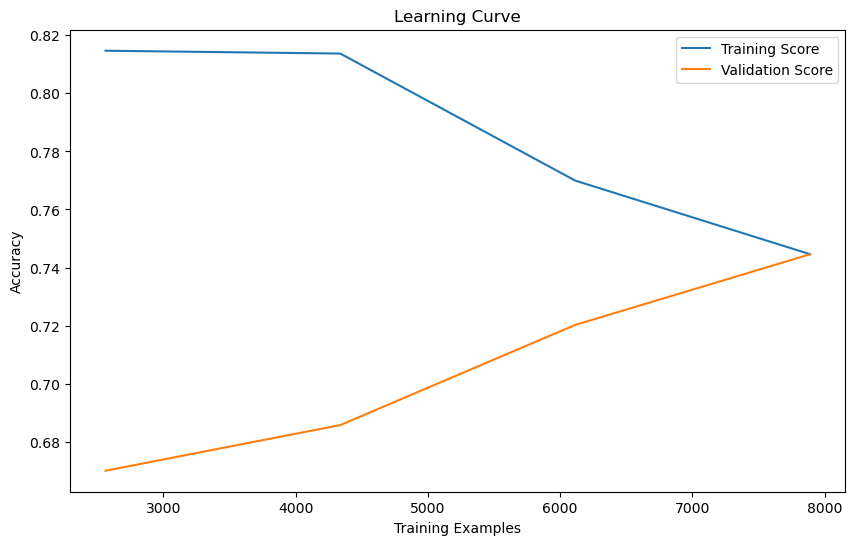

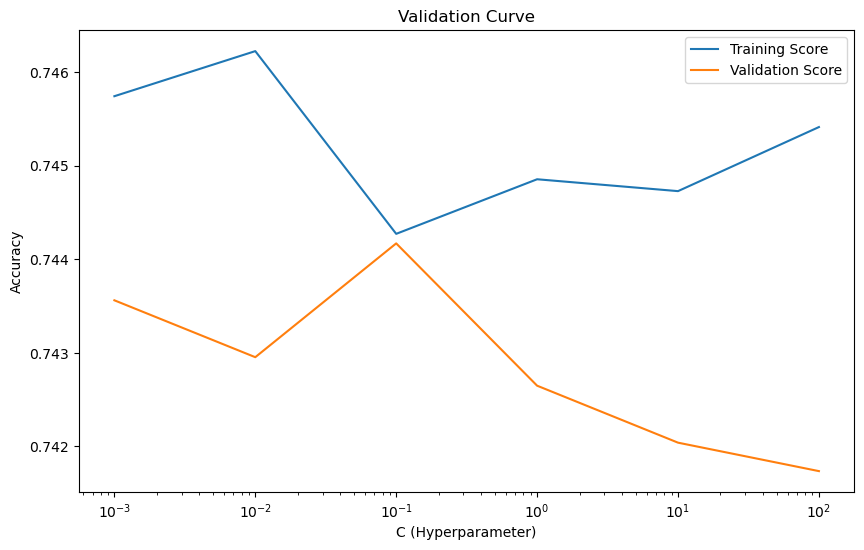

Cross-Validation Scores: [0.88443994 0.89001521 0.93661258 0.94168357 0.94827586]
Mean CV Accuracy: 0.92
Training Accuracy: 1.00
Testing Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1264
           1       0.81      0.81      0.81       421

    accuracy                           0.90      1685
   macro avg       0.87      0.87      0.87      1685
weighted avg       0.90      0.90      0.90      1685

Confusion Matrix:
[[1182   82]
 [  80  341]]


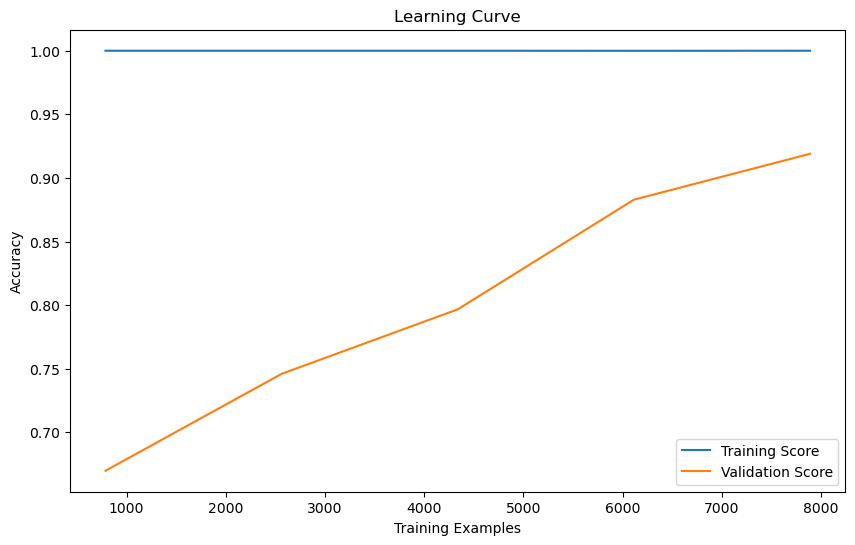

Cross-Validation Scores: [0.84591992 0.85504308 0.94776876 0.95385396 0.96095335]
Mean CV Accuracy: 0.91
Training Accuracy: 1.00
Testing Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1264
           1       0.83      0.81      0.82       421

    accuracy                           0.91      1685
   macro avg       0.88      0.87      0.88      1685
weighted avg       0.91      0.91      0.91      1685

Confusion Matrix:
[[1193   71]
 [  82  339]]


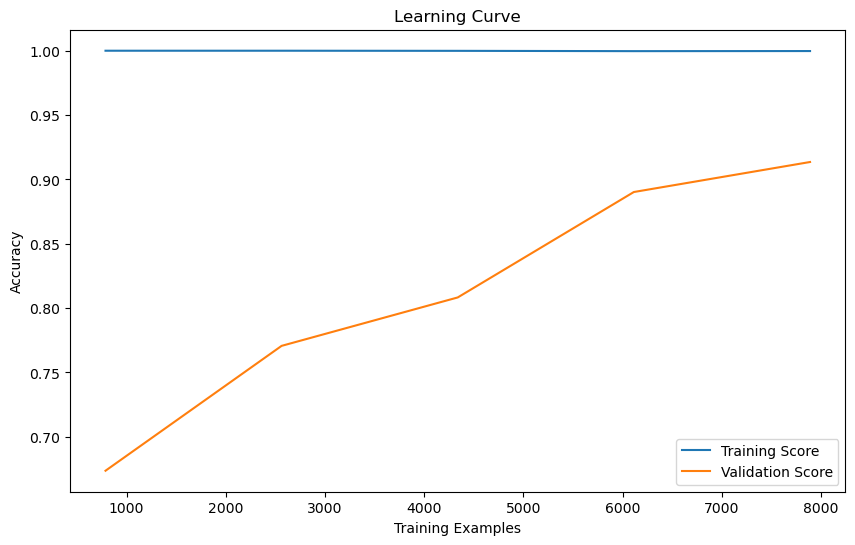

C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Cross-Validation Scores: [0.85909782 0.87227572 0.89858012 0.89756592 0.90770791]
Mean CV Accuracy: 0.89


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Training Accuracy: 0.96
Testing Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1264
           1       0.62      0.82      0.71       421

    accuracy                           0.83      1685
   macro avg       0.78      0.83      0.79      1685
weighted avg       0.86      0.83      0.84      1685

Confusion Matrix:
[[1056  208]
 [  76  345]]


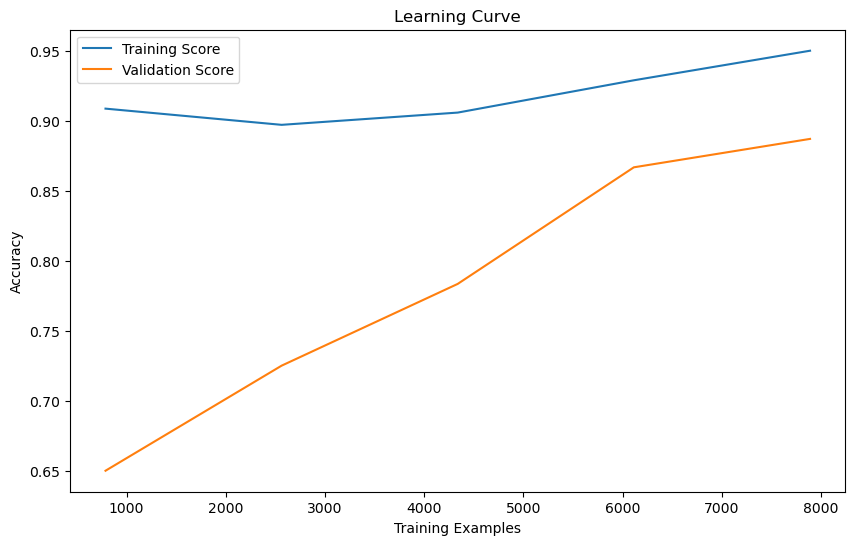

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

file_path = r"C:\Users\sv697\Downloads\weatherAUS.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop('Date', axis=1)

le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])

df = pd.get_dummies(df, columns=['Location'], drop_first=True)

df.fillna(0, inplace=True) 
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x in [1, 2] else 0)

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model 1: Logistic Regression with Hyperparameter Tuning
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg_classifier = LogisticRegression(random_state=42)
grid_search_logreg = GridSearchCV(logreg_classifier, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train_resampled, y_train_resampled)
best_logreg = grid_search_logreg.best_estimator_
evaluate_model(best_logreg, X_train_resampled, y_train_resampled, X_test, y_test)

# Model 2: RandomForestClassifier with Hyperparameter Tuning
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf = grid_search_rf.best_estimator_
evaluate_model(best_rf, X_train_resampled, y_train_resampled, X_test, y_test)

# Model 3: XGBoost with Hyperparameter Tuning
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=42)
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
best_xgb = grid_search_xgb.best_estimator_
evaluate_model(best_xgb, X_train_resampled, y_train_resampled, X_test, y_test)

# Model 4: k-Nearest Neighbors (KNN) with Hyperparameter Tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]}
knn_classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_resampled, y_train_resampled)
best_knn = grid_search_knn.best_estimator_
evaluate_model(best_knn, X_train_resampled, y_train_resampled, X_test, y_test)


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

file_path = r"C:\Users\sv697\Downloads\weatherAUS.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop('Date', axis=1)

le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])

df = pd.get_dummies(df, columns=['Location'], drop_first=True)

df.fillna(0, inplace=True)  
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x in [1, 2] else 0)

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model 1: Logistic Regression with Hyperparameter Tuning
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logreg_classifier = LogisticRegression(random_state=42)
grid_search_logreg = GridSearchCV(logreg_classifier, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train_resampled, y_train_resampled)
best_logreg = grid_search_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Model 2: RandomForestClassifier with Hyperparameter Tuning
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Model 3: XGBoost with Hyperparameter Tuning
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=42)
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Model 4: k-Nearest Neighbors (KNN) with Hyperparameter Tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]}
knn_classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_resampled, y_train_resampled)
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)

best_model = None
best_accuracy = 0

if accuracy_logreg > best_accuracy:
    best_model = best_logreg
    best_accuracy = accuracy_logreg

if accuracy_rf > best_accuracy:
    best_model = best_rf
    best_accuracy = accuracy_rf

if accuracy_xgb > best_accuracy:
    best_model = best_xgb
    best_accuracy = accuracy_xgb

if accuracy_knn > best_accuracy:
    best_model = best_knn
    best_accuracy = accuracy_knn

print("Final Model:", best_model)
print("Final Model Accuracy:", best_accuracy)


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7495548961424332
Random Forest Accuracy: 0.9038575667655786
XGBoost Accuracy: 0.9091988130563798
K-Nearest Neighbors Accuracy: 0.8314540059347181
Final Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Final Model Accuracy: 0.9091988130563798


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

file_path = r"C:\Users\sv697\Downloads\weatherAUS.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop('Date', axis=1)

le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])

df = pd.get_dummies(df, columns=['Location'], drop_first=True)

df.fillna(0, inplace=True) 
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x in [1, 2] else 0)

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Best Model (Random Forest) Accuracy:", accuracy_rf)
print("Best Model Parameters:", best_rf)


Best Model (Random Forest) Accuracy: 0.9038575667655786
Best Model Parameters: RandomForestClassifier(max_depth=20, n_estimators=150, random_state=42)


In [28]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

file_path = r"C:\Users\sv697\Downloads\weatherAUS.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop('Date', axis=1)

le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])

df = pd.get_dummies(df, columns=['Location'], drop_first=True)

df.fillna(0, inplace=True) 
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x in [1, 2] else 0)

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

joblib.dump(best_rf, 'best_model_rf.joblib')

print("Best Model (Random Forest) Accuracy:", accuracy_rf)
print("Best Model Parameters:", best_rf)
print("Model saved as 'best_model_rf.joblib'")


Best Model (Random Forest) Accuracy: 0.9038575667655786
Best Model Parameters: RandomForestClassifier(max_depth=20, n_estimators=150, random_state=42)
Model saved as 'best_model_rf.joblib'
